In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import warnings
import matplotlib.pyplot as plt 
from scipy.spatial.distance import cdist 
import pickle as pk
import seaborn as sn
import pickle as pk
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
import seaborn as sn
import os
import math
from collections import Counter
import h5py
import scipy
from tabulate import tabulate 
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings("ignore")

In [2]:
# Utility Functions
def accuracy(actual,predicted):
    
      c = 0
      for i in range(len(actual)):
          if(actual[i]!=predicted[i]):
              continue
          else:    
              c = c + 1
      return c/len(actual)

def errormetric(actual,predicted):
  ytrue = np.array(actual)
  ypred = np.array(predicted)
  MSE = np.square(ytrue-ypred)
  MSE = np.sum(MSE)/len(ytrue)
  return MSE 

In [3]:
#1.1.

def LoadData(pathtrain,pathtest):
  train = pd.read_csv(pathtrain,header=None,sep =' ')
  test = pd.read_csv(pathtest,header=None,sep =' ')
  
  YTrain = train[36]
  XTrain = train.drop(columns=[36],axis=1)
  YTrain = list(YTrain)
  YTrain = pd.DataFrame(YTrain,columns = ['Label'])

  YTest = test[36]
  XTest = test.drop(columns=[36],axis=1)
  YTest = list(YTest)
  YTest = pd.DataFrame(YTest,columns = ['Label'])

  return XTrain , YTrain , XTest , YTest ,train , test



pathtrain = '/content/drive/MyDrive/Projects/ML_Assignment/ML_Assignment_5/Dataset/sat.trn'
pathtest = '/content/drive/MyDrive/Projects/ML_Assignment/ML_Assignment_5/Dataset/sat.tst'
XTrain , YTrain , XTest , YTest  ,train , test = LoadData(pathtrain,pathtest)

In [4]:
print('Xtrain shape :',XTrain.shape)
print('Ytrain shape :',YTrain.shape)
print('Xtest shape :',XTest.shape)
print('Ytest shape :',YTest.shape)

Xtrain shape : (4435, 36)
Ytrain shape : (4435, 1)
Xtest shape : (2000, 36)
Ytest shape : (2000, 1)


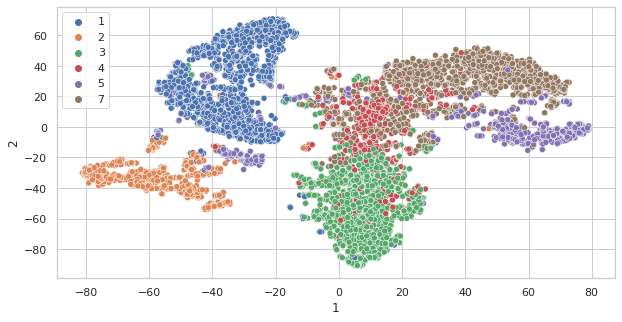

In [ ]:
def UTSNE(Data):
  Y = Data[36]
  X = Data.drop(columns=[36],axis=1)
  Y = list(Y)
  Y = pd.DataFrame(Y,columns = ['Label'])

  tsne = TSNE(n_components=2)
  df = tsne.fit_transform(X)
    
  df_tsne = pd.concat([pd.DataFrame(df,columns=['1','2']) ,Y],axis=1)

  plt.figure(figsize=(10,5))
  sn.set(style = 'whitegrid')
  sn.scatterplot(data= df_tsne,x='1',y='2',hue='Label',palette="deep")
  plt.legend()
  plt.show()

Data = pd.concat([train,test])
UTSNE(Data) 

In [5]:
#1.2.

class KNN():
  def __init__(self,k):
    self.k = k

  def Fit(self,XTrain,YTrain):
    self.XTrain = XTrain
    self.YTrain = YTrain

  def Predict(self,XTest):

    YPred = []
    self.YTrain = list(self.YTrain['Label'])
    for i in range(len(XTest)):
      dist_list =[]
      te = list(XTest.iloc[i])
      for j in range(len(self.XTrain)):
        tr = list(self.XTrain.iloc[j])     
        dist = scipy.spatial.distance.euclidean(te,tr)
        dist_list.append([dist,self.YTrain[j]])

      dist_df = pd.DataFrame(dist_list,columns =['Dist','Label'])      
      dist_df = dist_df.sort_values(by='Dist')
      dist_df = dist_df.head(self.k)
      lab_list = list(dist_df['Label'])
      lab = Counter(lab_list)
      out = lab.most_common(1)
      out = out[0]
      YPred.append(out[0])
      
    return YPred

   


In [6]:
NE = [i for i in range(1,10)]

def OptimalK(XTrain , YTrain , XTest , YTest,k):
  k = KNN(k=k)
  k.Fit(XTrain , YTrain)
  Pred = k.Predict(XTest)
  MSE = errormetric(list(YTest['Label']),list(Pred))
  return Pred,MSE

# predlabel = []  
# mse = []
# for i in NE:
#   Pred ,MSE = OptimalK(XTrain, YTrain , XTest, YTest,i)
#   predlabel.append(Pred)
#   mse.append(MSE)
#   print(i)

In [7]:
# path = '/content/drive/MyDrive/Projects/ML_Assignment/ML_Assignment_5/Saved_Models/1/'
# path1 = path + 'mse'
# with open(path1, "wb") as f: 
#   pk.dump(mse, f)

# path2 = path + 'pred'
# with open(path2, "wb") as f: 
#   pk.dump(predlabel, f)

path = '/content/drive/MyDrive/Projects/ML_Assignment/ML_Assignment_5/Saved_Models/1/'

path1 = path + 'mse'
mse =   pk.load(open(path1,'rb'))

path2 = path + 'pred'
predlabel =   pk.load(open(path2,'rb'))



Optimal Value of K :  3


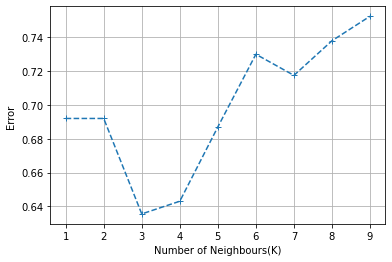

In [8]:
optk = NE[mse.index(min(mse))]
print('Optimal Value of K : ',optk)
plt.plot(NE,mse,marker='+',linestyle='dashed',)
plt.xlabel('Number of Neighbours(K)')
plt.ylabel('Error ')
plt.grid()
plt.show()

In [9]:
#1.3.

def printfinal(XTrain , YTrain , XTest , YTest,optk,NE,predlabel):
  # Userdefined
  ku = KNN(k=optk)
  ku.Fit(XTrain , YTrain)
  TrainPredu = ku.Predict(XTrain)
  TestPredu = predlabel[NE.index(optk)]
  trainaccu = round(accuracy(list(YTrain['Label']),list(TrainPredu))*100,3)
  testaccu = round(accuracy(list(YTest['Label']),list(TestPredu))*100,3)

  # Sklearn function
  ks = KNeighborsClassifier(n_neighbors=optk)
  ks.fit(XTrain,YTrain)
  TrainPreds = ks.predict(XTrain)
  TestPreds = ks.predict(XTest)
  trainaccs = round(accuracy(list(YTrain['Label']),list(TrainPreds)),3)*100
  testaccs = round(accuracy(list(YTest['Label']),list(TestPreds)),3)*100

  Traina = [trainaccu,trainaccs]
  Testa = [testaccu,testaccs]
  Res = pd.DataFrame()
  Res['Method'] = ['User Defined', 'Sklearn Function']
  Res['Training Accuracy'] = Traina
  Res['Testing Accuracy'] = Testa
  
  return Res

#Res = printfinal(XTrain , YTrain , XTest , YTest,optk,NE,predlabel)

In [10]:
# path = '/content/drive/MyDrive/Projects/ML_Assignment/ML_Assignment_5/Saved_Models/1/'
# path1 = path + 'res'
# with open(path1, "wb") as f: 
#   pk.dump(Res, f)

path = '/content/drive/MyDrive/Projects/ML_Assignment/ML_Assignment_5/Saved_Models/1/'
path1 = path + 'res'
Res =   pk.load(open(path1,'rb'))
print('\t\t\tTable Stats')
print(tabulate(Res, tablefmt = 'psql',headers = 'keys'))

			Table Stats
+----+------------------+---------------------+--------------------+
|    | Method           |   Training Accuracy |   Testing Accuracy |
|----+------------------+---------------------+--------------------|
|  0 | User Defined     |              95.806 |              90.65 |
|  1 | Sklearn Function |              95.3   |              90.3  |
+----+------------------+---------------------+--------------------+
